In [2]:
import numpy as np
import matplotlib.pyplot as plt

🎯 SUPER SIMPLE K-MEANS DEMO
Creating sample data...
Made 90 data points in 3 natural groups

Running K-means to find 3 groups...
------------------------------
Step 1:
  Group 1: 11 points, center at (3.3, 6.8)
  Group 2: 16 points, center at (1.7, 6.1)
  Group 3: 63 points, center at (3.7, 4.0)
Step 2:
  Group 1: 26 points, center at (5.5, 6.3)
  Group 2: 27 points, center at (1.9, 6.1)
  Group 3: 37 points, center at (2.7, 2.6)
Step 3:
  Group 1: 30 points, center at (5.9, 6.0)
  Group 2: 30 points, center at (2.0, 6.1)
  Group 3: 30 points, center at (1.9, 1.9)
Step 4:
  Group 1: 30 points, center at (5.9, 6.0)
  Group 2: 30 points, center at (2.0, 6.1)
  Group 3: 30 points, center at (1.9, 1.9)
✓ Converged! Centers stopped moving.

🎉 FINAL RESULTS:
Found 3 centers at:
  Center 1: (5.9, 6.0)
  Center 2: (2.0, 6.1)
  Center 3: (1.9, 1.9)


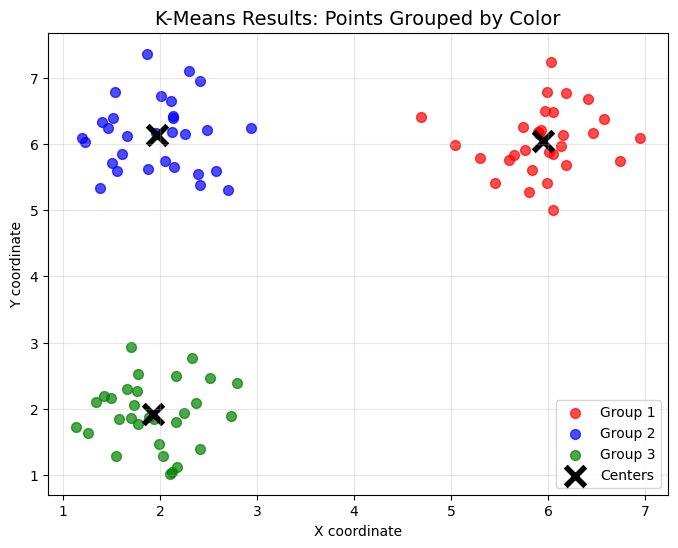


HOW IT WORKS (In Plain English):

Imagine you have dots scattered on paper and want to organize them into groups:

1. 🎯 PLACE MARKERS: Put 3 markers randomly on the paper
2. 🔗 GROUP DOTS: Each dot joins the nearest marker  
3. 📍 MOVE MARKERS: Move each marker to the center of its dot group
4. 🔄 REPEAT: Keep doing steps 2-3 until markers stop moving

That's it! The markers find the natural centers of your dot groups.

WHEN TO USE K-MEANS:
✅ When you want to find natural groups in data
✅ When groups are roughly circular/blob-shaped
✅ When you know roughly how many groups to expect

✨ Perfect for things like:
   • Customer types based on shopping habits
   • Different species in biology data
   • Market segments in business data


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Super Simple K-Means in just a few lines!

def simple_kmeans(data, k=3):
    """
    The simplest K-means you'll ever see!
    
    What it does:
    1. Pick k random centers
    2. Group points by nearest center  
    3. Move centers to middle of groups
    4. Repeat until centers stop moving
    """
    
    # Step 1: Pick random starting centers
    centers = data[np.random.choice(len(data), k, replace=False)]
    
    for step in range(20):  # Do max 20 steps
        print(f"Step {step + 1}:")
        
        # Step 2: Find which center each point is closest to
        distances = []
        for center in centers:
            # Distance from each point to this center
            dist = np.sqrt(np.sum((data - center)**2, axis=1))
            distances.append(dist)
        
        # Find the closest center for each point
        distances = np.array(distances)
        groups = np.argmin(distances, axis=0)  # 0=red, 1=blue, 2=green
        
        # Step 3: Move centers to middle of their groups
        new_centers = []
        for i in range(k):
            # Find all points in group i
            points_in_group = data[groups == i]
            if len(points_in_group) > 0:
                # Move center to average position
                new_center = np.mean(points_in_group, axis=0)
                new_centers.append(new_center)
                print(f"  Group {i+1}: {len(points_in_group)} points, center at ({new_center[0]:.1f}, {new_center[1]:.1f})")
            else:
                new_centers.append(centers[i])  # Keep old center if no points
        
        new_centers = np.array(new_centers)
        
        # Step 4: Check if centers stopped moving
        if np.allclose(centers, new_centers, atol=0.1):
            print(f"✓ Converged! Centers stopped moving.\n")
            break
            
        centers = new_centers
    
    return centers, groups

def plot_results(data, centers, groups):
    """Draw the results"""
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    
    plt.figure(figsize=(8, 6))
    
    # Draw each group in different color
    for i in range(len(centers)):
        group_points = data[groups == i]
        plt.scatter(group_points[:, 0], group_points[:, 1], 
                   c=colors[i], alpha=0.7, s=50, label=f'Group {i+1}')
    
    # Draw centers as big X marks
    plt.scatter(centers[:, 0], centers[:, 1], 
               c='black', marker='x', s=200, linewidth=4, label='Centers')
    
    plt.title('K-Means Results: Points Grouped by Color', fontsize=14)
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Let's try it with some example data!
print("🎯 SUPER SIMPLE K-MEANS DEMO")
print("="*40)

# Create some sample data points
print("Creating sample data...")
np.random.seed(42)  # So we get the same results each time

# Make 3 groups of points
group1 = np.random.normal([2, 2], 0.5, (30, 2))    # 30 points around (2,2)
group2 = np.random.normal([6, 6], 0.5, (30, 2))    # 30 points around (6,6)  
group3 = np.random.normal([2, 6], 0.5, (30, 2))    # 30 points around (2,6)

# Combine all points
data = np.vstack([group1, group2, group3])
print(f"Made {len(data)} data points in 3 natural groups\n")

# Apply our simple K-means
print("Running K-means to find 3 groups...")
print("-" * 30)
centers, groups = simple_kmeans(data, k=3)

# Show the results
print("🎉 FINAL RESULTS:")
print(f"Found 3 centers at:")
for i, center in enumerate(centers):
    print(f"  Center {i+1}: ({center[0]:.1f}, {center[1]:.1f})")

# Draw the results
plot_results(data, centers, groups)

print("\n" + "="*50)
print("HOW IT WORKS (In Plain English):")
print("="*50)
print("""
Imagine you have dots scattered on paper and want to organize them into groups:

1. 🎯 PLACE MARKERS: Put 3 markers randomly on the paper
2. 🔗 GROUP DOTS: Each dot joins the nearest marker  
3. 📍 MOVE MARKERS: Move each marker to the center of its dot group
4. 🔄 REPEAT: Keep doing steps 2-3 until markers stop moving

That's it! The markers find the natural centers of your dot groups.
""")

print("WHEN TO USE K-MEANS:")
print("✅ When you want to find natural groups in data")
print("✅ When groups are roughly circular/blob-shaped") 
print("✅ When you know roughly how many groups to expect")
print("\n✨ Perfect for things like:")
print("   • Customer types based on shopping habits")
print("   • Different species in biology data") 
print("   • Market segments in business data")